<a href="https://colab.research.google.com/github/lprockop/NLPGroup10/blob/main/PrelimAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Final Project

### Current state:
(Last updated 4/18/23, Lyle)
- Added mean line to NYT moral nonmoral ratio scores (dropped obs. with NaN)
- Still need to update models
    - Run on moral-nonmoral ratio, not sanctity_sent
    - Preprocess text copying class code

### Note: 
After making any updates, please update GitHub project!

### Import data

In [1]:
#read in csvs (note: these files are in the Input folder in this GitHub repo so the file names shouldn't change!)
import pandas as pd
nyt = pd.read_csv('Input/nyt_abortion_1200.csv').drop(columns='Unnamed: 0')
sc = pd.read_csv('Input/scotus_abortion.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

#add year column to NYT dataset
year = []
for i in nyt.pub_date:
  year.append(int(i[0:4]))
nyt['year'] = year

# Moral Foundations using eFMD

In [2]:
#install necessary modules
!pip install -U pip setuptools wheel
!pip install -U spacy==3.4.0
!python -m spacy download en_core_web_sm
!pip install git+https://github.com/medianeuroscience/emfdscore.git

  Using cached pip-23.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\lproc\anaconda3\python.exe -m pip install -U pip setuptools wheel

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 12.8/12.8 MB 7.0 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.4.1/en_core_web_sm-3.4.1-py3-none-any.whl#egg=en_core_web_sm==3.4.1 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Cloning https://github.com/medianeuroscience/emfdscore.git to c:\users\lproc\appdata\local\temp\pip-req-build-wog0bmbn
  Resolved https://github.com/medianeuroscience/emfdscore.git to commit 64dfaea0cdb00f11921dc6278d46201d73128a80
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/medianeuroscience/emfdscore.git 'C:\Users\lproc\AppData\Local\Temp\pip-req-build-wog0bmbn'

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#import packages we'll need
import pandas as pd 
import numpy as np
#format text columns in the proper format for eFMD...
#...in NYT dataframe
template_input_nyt = pd.DataFrame(nyt['abstract']).sort_values('abstract', ascending=False).dropna()
template_input_nyt = template_input_nyt[template_input_nyt['abstract']!=''].sort_values('abstract').rename({'abstract':0}, axis=1)
template_input_nyt = template_input_nyt.reset_index().drop('index', axis=1)
#...in SC dataframe
template_input_sc = pd.DataFrame(sc['text']).sort_values('text', ascending=False).dropna()
template_input_sc = template_input_sc[template_input_sc['text']!=''].sort_values('text').rename({'text':0}, axis=1)
template_input_sc = template_input_sc.reset_index().drop('index', axis=1)

In [4]:
#import and run eFMD scoring
from emfdscore.scoring import score_docs 
num_docs_nyt = len(template_input_nyt)
num_docs_sc = len(template_input_sc)
DICT_TYPE = 'emfd'
PROB_MAP = 'all'
SCORE_METHOD = 'bow'
OUT_METRICS = 'sentiment'
#create new dfs to hold the results
df_nyt = score_docs(template_input_nyt, DICT_TYPE, PROB_MAP, SCORE_METHOD, OUT_METRICS, num_docs_nyt)
df_sc = score_docs(template_input_sc, DICT_TYPE, PROB_MAP, SCORE_METHOD, OUT_METRICS, num_docs_sc)
#combine dfs that hold the initial data with the results
nyt_df = pd.concat((nyt, df_nyt), axis=1)
sc_df = pd.concat((sc, df_sc), axis=1)
#examine output for SC
sc_df.head()

Processed: 1189 100% |❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤| Elapsed Time: 0:00:05 Time:  0:00:05
Processed: 35 100% |❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤| Elapsed Time: 0:00:10 Time:  0:00:10


,Unnamed: 0.2,author_name,category,per_curiam,case_name,date_filed,federal_cite_one,absolute_url,cluster,year_filed,...,authority_p,sanctity_p,care_sent,fairness_sent,loyalty_sent,authority_sent,sanctity_sent,moral_nonmoral_ratio,f_var,sent_var
0,0,Justice Blackmun,majority,False,Roe v. Wade,1973-01-22,NaN,https://www.courtlistener.com/opinion/108713/r...,https://www.courtlistener.com/api/rest/v3/clus...,1973,...,0.104120,0.088544,-0.078838,-0.049894,-0.024090,-0.022071,-0.050575,0.881183,0.000073,0.000541
1,1,Justice O'Connor and Kennedy and Souter,majority,False,Planned Parenthood of Southeastern Pa. v. Casey,1992-06-29,NaN,https://www.courtlistener.com/opinion/112786/p...,NaN,1992,...,0.104372,0.092741,-0.071447,-0.045651,-0.026034,-0.034011,-0.047386,1.399520,0.000089,0.000296
2,2,Justice Stewart,concurring,False,Roe v. Wade,1973-01-22,NaN,https://www.courtlistener.com/opinion/108713/r...,https://www.courtlistener.com/api/rest/v3/clus...,1973,...,0.104660,0.086185,-0.089379,-0.015917,-0.007430,-0.005189,-0.051946,1.174528,0.000169,0.001313
3,3,Justice Rehnquist,dissenting,False,Roe v. Wade,1973-01-22,NaN,https://www.courtlistener.com/opinion/108713/r...,https://www.courtlistener.com/api/rest/v3/clus...,1973,...,0.104747,0.082228,-0.089115,-0.024546,-0.029659,-0.038441,-0.071355,1.054968,0.000187,0.000795
4,4,per_curiam,per_curiam,True,Poelker v. Doe,1977-06-20,NaN,https://www.courtlistener.com/opinion/109712/p...,https://www.courtlistener.com/api/rest/v3/clus...,1977,...,0.105832,0.086574,-0.080738,-0.044666,-0.030372,-0.028697,-0.051229,1.013566,0.000106,0.000443


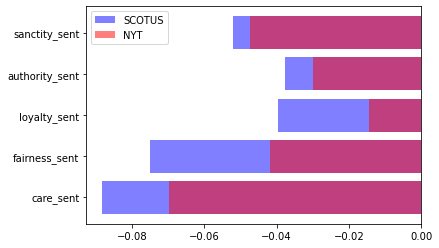

In [5]:
sc_df_sub = sc_df[['care_sent', 'fairness_sent', 'loyalty_sent', 'authority_sent', 'sanctity_sent']]
nyt_df_sub = nyt_df[['care_sent', 'fairness_sent', 'loyalty_sent', 'authority_sent', 'sanctity_sent']]

import matplotlib.pyplot as plt

plt.barh(nyt_df_sub.columns, nyt_df_sub.mean(), alpha=0.5, color='blue', label='SCOTUS')
plt.barh(sc_df_sub.columns, sc_df_sub.mean(), alpha=0.5, color='red', label='NYT')
plt.legend()
plt.savefig('Output/avgsentscore.png')
plt.show()

## Moral to Non-Moral Ratio

In [6]:
#drop values for each df where moral-nonmoral ratio is NaN, missing, or undefined.
nyt_df = nyt_df[nyt_df.moral_nonmoral_ratio.isna() == False]

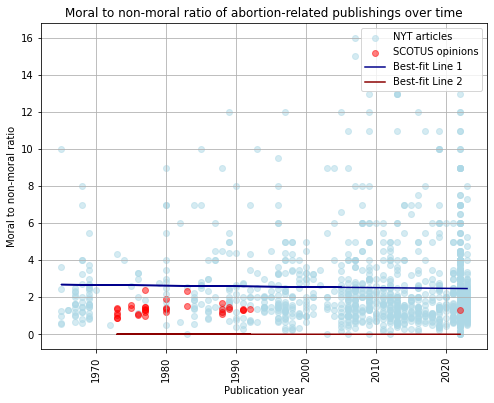

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(nyt_df.year, nyt_df.moral_nonmoral_ratio, alpha=0.5, color='lightblue', label='NYT articles')
plt.scatter(sc_df.year_filed, sc_df.moral_nonmoral_ratio, alpha=0.5, color='red', label='SCOTUS opinions')

coefficients_nyt = np.polyfit(nyt_df.year, nyt_df.moral_nonmoral_ratio, 1)
coefficients_sc = np.polyfit(sc_df.year_filed, sc_df.moral_nonmoral_ratio, 5)

slope1, intercept1 = coefficients_nyt[0], coefficients_nyt[1]
slope2, intercept2 = coefficients_sc[0], coefficients_sc[1]

best_fit_line1 = slope1 * nyt_df.year + intercept1
best_fit_line2 = slope2 * sc_df.year_filed + intercept2

plt.plot(nyt_df.year, best_fit_line1, c='darkblue', label='Best-fit Line 1')
plt.plot(sc_df.year_filed, best_fit_line2, c='darkred', label='Best-fit Line 2')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Moral to non-moral ratio')
plt.title('Moral to non-moral ratio of abortion-related publishings over time')
plt.grid()
plt.savefig('Output/moralnonmoralratio.png')
plt.show()

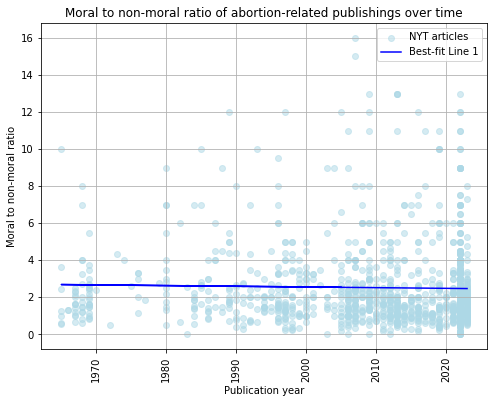

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(nyt_df.year, nyt_df.moral_nonmoral_ratio, alpha=0.5, color='lightblue', label='NYT articles')

coefficients_nyt = np.polyfit(nyt_df.year, nyt_df.moral_nonmoral_ratio, 1)

slope1, intercept1 = coefficients_nyt[0], coefficients_nyt[1]

best_fit_line1 = slope1 * nyt_df.year + intercept1

plt.plot(nyt_df.year, best_fit_line1, c='b', label='Best-fit Line 1')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Moral to non-moral ratio')
plt.title('Moral to non-moral ratio of abortion-related publishings over time')
plt.grid()
plt.savefig('Output/moralnonmoralratioNYT.png')
plt.show()

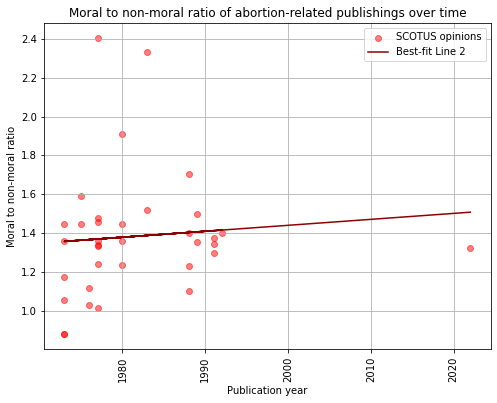

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(sc_df.year_filed, sc_df.moral_nonmoral_ratio, alpha=0.5, color='red', label='SCOTUS opinions')

coefficients_sc = np.polyfit(sc_df.year_filed, sc_df.moral_nonmoral_ratio, 1)

slope2, intercept2 = coefficients_sc[0], coefficients_sc[1]

best_fit_line2 = slope2 * sc_df.year_filed + intercept2

plt.plot(sc_df.year_filed, best_fit_line2, c='darkred', label='Best-fit Line 2')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Moral to non-moral ratio')
plt.title('Moral to non-moral ratio of abortion-related publishings over time')
plt.grid()
plt.savefig('Output/moralnonmoralratioscotus.png')
plt.show()

best fit line indicates SC has higher moral to non-moral over time

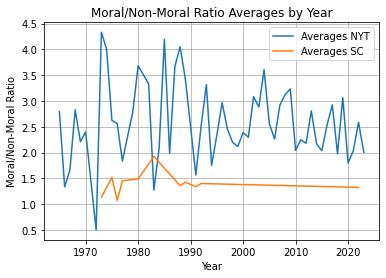

In [10]:
# plotting averages

averages_mnm_nyt = nyt_df.groupby('year')['moral_nonmoral_ratio'].mean()
averages_mnm_sc = sc_df.groupby('year_filed')['moral_nonmoral_ratio'].mean()

plt.plot(averages_mnm_nyt.index, averages_mnm_nyt.values, label='Averages NYT')

plt.plot(averages_mnm_sc.index, averages_mnm_sc.values, label='Averages SC')

plt.xlabel('Year')
plt.ylabel('Moral/Non-Moral Ratio')
plt.title('Moral/Non-Moral Ratio Averages by Year')
plt.grid()
plt.savefig('Output/moralnonmoralaverages.png')
plt.legend()

# Show the plot
plt.show()

overall NYT way higher moral-non moral ratio 

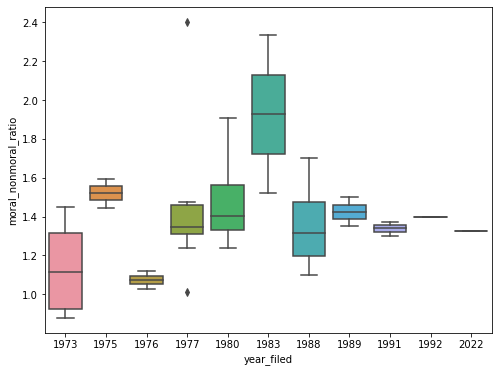

In [11]:
#look at distribution of SCOTUS specifically
import seaborn as sns
plt.figure(figsize=(8,6))
sns.boxplot(x='year_filed', y='moral_nonmoral_ratio', data=sc_df)
plt.savefig('Output/scmnmdistribution.png')
plt.show()

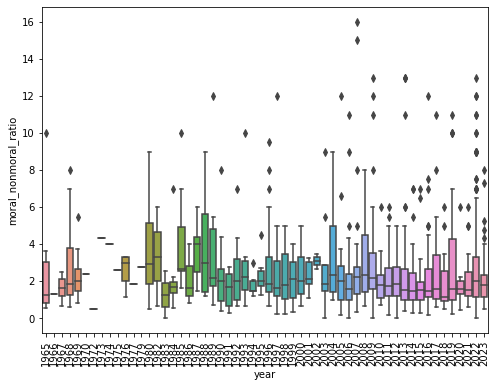

In [12]:
#look at distribution of NYT specifically
import seaborn as sns
plt.figure(figsize=(8,6))
sns.boxplot(x='year', y='moral_nonmoral_ratio', data=nyt_df)
plt.xticks(rotation=90)
plt.savefig('Output/nytmnmdist.png')
plt.show()

## Vice-Virtue Analysis

In [13]:
# running vice virtue analysis

from emfdscore.scoring import score_docs 

num_docs_nyt = len(template_input_nyt)
num_docs_sc = len(template_input_sc)

DICT_TYPE = 'mfd'
PROB_MAP = 'all'
SCORE_METHOD = 'bow'
OUT_METRICS = ''

#create new dfs to hold the results
df_nyt_v = score_docs(template_input_nyt, DICT_TYPE, PROB_MAP, SCORE_METHOD, OUT_METRICS, num_docs_nyt)
df_sc_v = score_docs(template_input_sc, DICT_TYPE, PROB_MAP, SCORE_METHOD, OUT_METRICS, num_docs_sc)
#combine dfs that hold the initial data with the results
nyt_df_v = pd.concat((nyt, df_nyt_v), axis=1)
sc_df_v = pd.concat((sc, df_sc_v), axis=1).drop(columns=['Unnamed: 0.2'])
#examine output for SC
sc_df_v.head()

Processed: 1189 100% |❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤| Elapsed Time: 0:00:10 Time:  0:00:10
Processed: 35 100% |❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤| Elapsed Time: 0:00:22 Time:  0:00:22


,author_name,category,per_curiam,case_name,date_filed,federal_cite_one,absolute_url,cluster,year_filed,scdb_id,...,authority.virtue,sanctity.virtue,care.vice,fairness.vice,loyalty.vice,authority.vice,sanctity.vice,moral,moral_nonmoral_ratio,f_var
0,Justice Blackmun,majority,False,Roe v. Wade,1973-01-22,NaN,https://www.courtlistener.com/opinion/108713/r...,https://www.courtlistener.com/api/rest/v3/clus...,1973,1972-048,...,0.332061,0.011450,0.039440,0.013995,0.017812,0.113232,0.003817,0.134860,0.058657,0.010225
1,Justice O'Connor and Kennedy and Souter,majority,False,Planned Parenthood of Southeastern Pa. v. Casey,1992-06-29,NaN,https://www.courtlistener.com/opinion/112786/p...,NaN,1992,1991-117,...,0.267380,0.010695,0.117647,0.030303,0.035651,0.049911,0.003565,0.160428,0.066548,0.006358
2,Justice Stewart,concurring,False,Roe v. Wade,1973-01-22,NaN,https://www.courtlistener.com/opinion/108713/r...,https://www.courtlistener.com/api/rest/v3/clus...,1973,1972-048,...,0.125000,0.000000,0.062500,0.000000,0.000000,0.093750,0.000000,0.187500,0.074592,0.007172
3,Justice Rehnquist,dissenting,False,Roe v. Wade,1973-01-22,NaN,https://www.courtlistener.com/opinion/108713/r...,https://www.courtlistener.com/api/rest/v3/clus...,1973,1972-048,...,0.209877,0.074074,0.098765,0.000000,0.012346,0.086420,0.012346,0.185185,0.043478,0.006070
4,per_curiam,per_curiam,True,Poelker v. Doe,1977-06-20,NaN,https://www.courtlistener.com/opinion/109712/p...,https://www.courtlistener.com/api/rest/v3/clus...,1977,1976-157,...,0.310000,0.000000,0.000000,0.010000,0.040000,0.030000,0.010000,0.200000,0.050556,0.011366


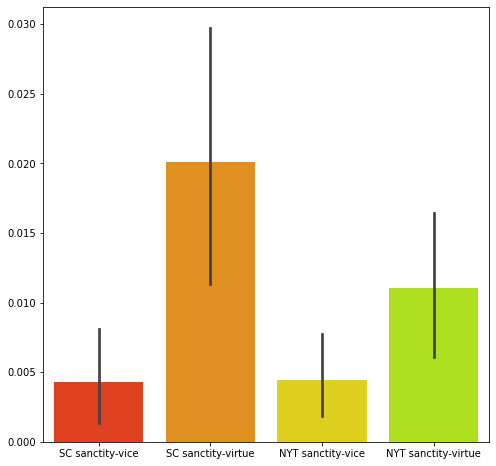

In [92]:
sc_df_v_sub = sc_df_v[['care.vice', 'care.virtue',
                     'fairness.vice', 'fairness.virtue',
                     'loyalty.vice', 'loyalty.virtue',
                     'authority.vice', 'authority.virtue',
                     'sanctity.vice', 'sanctity.virtue']]
nyt_df_v_sub = nyt_df_v[['care.vice', 'care.virtue',
                     'fairness.vice', 'fairness.virtue',
                     'loyalty.vice', 'loyalty.virtue',
                     'authority.vice', 'authority.virtue',
                     'sanctity.vice', 'sanctity.virtue']]

san_vv = pd.concat((sc_df_v_sub[['sanctity.vice', 'sanctity.virtue']], nyt_df_v_sub[['sanctity.vice', 'sanctity.virtue']]),
                  axis=1, ignore_index=True).rename(columns={0:'SC sanctity-vice', 1:'SC sanctity-virtue', 2:'NYT sanctity-vice', 3:'NYT sanctity-virtue'})
san_vv

plt.figure(figsize=(8,8))
sns.barplot(data=san_vv, palette='prism')
plt.savefig('Output/sanctityvicevirtue')
plt.show()

In [ ]:
import seaborn as sns
sns.boxplot(san_vv.)

In [ ]:
#plot average for all vice and virtue scores
plt.barh(sc_df_v_sub.columns, sc_df_v_sub.mean(), alpha=0.5, color='red', label='SCOTUS')
plt.barh(nyt_df_v_sub.columns, nyt_df_v_sub.mean(), alpha=0.5, color='blue', label='NYT')
plt.legend()
plt.savefig('Output/vicevirtueavgsentscore.png')
plt.show()

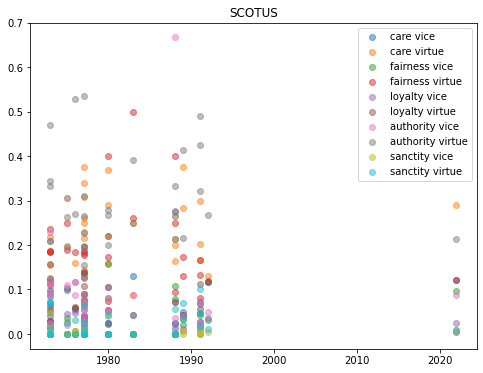

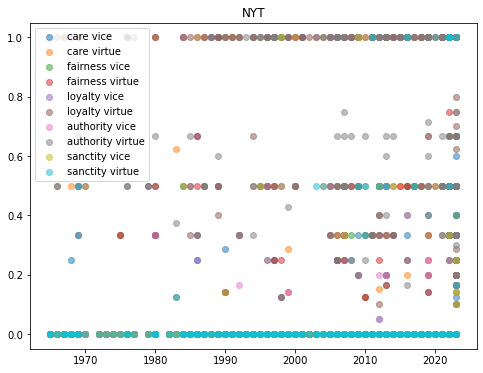

In [15]:
sc_df_v_sub = sc_df_v[['year_filed',
                       'care.vice', 'care.virtue',
                     'fairness.vice', 'fairness.virtue',
                     'loyalty.vice', 'loyalty.virtue',
                     'authority.vice', 'authority.virtue',
                     'sanctity.vice', 'sanctity.virtue']]
nyt_df_v_sub = nyt_df_v[['year',
                         'care.vice', 'care.virtue',
                     'fairness.vice', 'fairness.virtue',
                     'loyalty.vice', 'loyalty.virtue',
                     'authority.vice', 'authority.virtue',
                     'sanctity.vice', 'sanctity.virtue']]

plt.figure(figsize=(8, 6))
plt.scatter(sc_df_v_sub.year_filed, sc_df_v_sub['care.vice'], alpha=0.5, label='care vice')
plt.scatter(sc_df_v_sub.year_filed, sc_df_v_sub['care.virtue'], alpha=0.5, label='care virtue')

plt.scatter(sc_df_v_sub.year_filed, sc_df_v_sub['fairness.vice'], alpha=0.5, label='fairness vice')
plt.scatter(sc_df_v_sub.year_filed, sc_df_v_sub['fairness.virtue'], alpha=0.5, label='fairness virtue')

plt.scatter(sc_df_v_sub.year_filed, sc_df_v_sub['loyalty.vice'], alpha=0.5, label='loyalty vice')
plt.scatter(sc_df_v_sub.year_filed, sc_df_v_sub['loyalty.virtue'], alpha=0.5, label='loyalty virtue')

plt.scatter(sc_df_v_sub.year_filed, sc_df_v_sub['authority.vice'], alpha=0.5, label='authority vice')
plt.scatter(sc_df_v_sub.year_filed, sc_df_v_sub['authority.virtue'], alpha=0.5, label='authority virtue')

plt.scatter(sc_df_v_sub.year_filed, sc_df_v_sub['sanctity.vice'], alpha=0.5, label='sanctity vice')
plt.scatter(sc_df_v_sub.year_filed, sc_df_v_sub['sanctity.virtue'], alpha=0.5, label='sanctity virtue')

plt.legend()
plt.title('SCOTUS')
plt.savefig('Output/scotusvicevirtue.png')
plt.show()



plt.figure(figsize=(8, 6))
plt.scatter(nyt_df_v_sub.year, nyt_df_v_sub['care.vice'], alpha=0.5, label='care vice')
plt.scatter(nyt_df_v_sub.year, nyt_df_v_sub['care.virtue'], alpha=0.5, label='care virtue')

plt.scatter(nyt_df_v_sub.year, nyt_df_v_sub['fairness.vice'], alpha=0.5, label='fairness vice')
plt.scatter(nyt_df_v_sub.year, nyt_df_v_sub['fairness.virtue'], alpha=0.5, label='fairness virtue')

plt.scatter(nyt_df_v_sub.year, nyt_df_v_sub['loyalty.vice'], alpha=0.5, label='loyalty vice')
plt.scatter(nyt_df_v_sub.year, nyt_df_v_sub['loyalty.virtue'], alpha=0.5, label='loyalty virtue')

plt.scatter(nyt_df_v_sub.year, nyt_df_v_sub['authority.vice'], alpha=0.5, label='authority vice')
plt.scatter(nyt_df_v_sub.year, nyt_df_v_sub['authority.virtue'], alpha=0.5, label='authority virtue')

plt.scatter(nyt_df_v_sub.year, nyt_df_v_sub['sanctity.vice'], alpha=0.5, label='sanctity vice')
plt.scatter(nyt_df_v_sub.year, nyt_df_v_sub['sanctity.virtue'], alpha=0.5, label='sanctity virtue')

plt.legend()
plt.title('NYT')
plt.savefig('Output/nytvicevirtue.png')
plt.show()

Overall conclusions from this: 
SC consistently mentions sanctity mf (moral foundation) in a more positive light. Over the years, it has also gotten more positive, until the 2022 ruling. (need more input) 

NYT sanctity.vice has dropped in recent years, and sanctity.virtue has increased. More positive light overall.

# Prediction model

Given a corpus, what is the predicted sanctity score?

In [16]:
from Functions.utils import *

In [17]:
#CLEAN TEXT

df = pd.concat((sc_df[['text', 'moral_nonmoral_ratio']], 
                nyt_df[['abstract', 'moral_nonmoral_ratio']].rename(columns={'abstract':'text'})), 
               axis=0, ignore_index=True).dropna(how='any', axis=0)

text_clean = []
for i in df['text']:
    text_clean.append(clean_text(i))

labels = []
for i in df['moral_nonmoral_ratio']:
    if i > df.moral_nonmoral_ratio.median():
        labels.append(1)
    else:
        labels.append(0)
        
df['clean_text'] = text_clean
df['label'] = labels

#remove stopwords

text_tmp = df['clean_text'].apply(rem_sw)
text_tmp = text_tmp.apply(stem_fun)

#vectorize
vec = vec_fun(text_tmp, 1, 1, 'tfidf', 'Functions/')

In [19]:
#rf model
grid_in = {'n_estimators':[10, 20, 30], 
          'max_depth':[10, 20, 30]}
model_rf = grid_fun(vec, labels, grid_in, 0.2, 5, 'Functions/', 'rf')

#svm model
grid_in = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
          'C':[0.01, 0.1, 1, 10]}
model_svm = grid_fun(vec, labels, grid_in, 0.2, 5, 'Functions/', 'svm')

#gnb model
grid_in = {'var_smoothing': np.logspace(0,-9, num=100)}
model_gnb = grid_fun(vec, labels, grid_in, 0.2, 5, 'Functions/', 'gnb')

Model passed: rf
Best params: {'max_depth': 10, 'n_estimators': 10}
Train set score: 0.7257731958762886
Test set score: 0.5679012345679012
Model passed: svm
Best params: {'C': 10, 'kernel': 'sigmoid'}
Train set score: 0.9402061855670103
Test set score: 0.5020576131687243
Model passed: gnb
Best params: {'var_smoothing': 0.03511191734215131}
Train set score: 0.9731958762886598
Test set score: 0.5473251028806584


In [39]:
#manually score to visualize
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vec, labels, test_size=0.2, random_state=42)
results = pd.DataFrame()

for i in [model_rf, model_svm, model_gnb]:
    train_score = i.score(X_train, y_train)
    test_score = i.score(X_test, y_test)
    res_tmp = pd.DataFrame([train_score, test_score]).T
    results = pd.concat((results, res_tmp), axis=0, ignore_index=True)
    
results = results.rename(index={0:'RF', 1: 'SVM', 2: 'GNB'},
                         columns={0:'Train score', 1: 'Test score'})

results

,Train score,Test score
RF,0.725773,0.567901
SVM,0.940206,0.502058
GNB,0.973196,0.547325


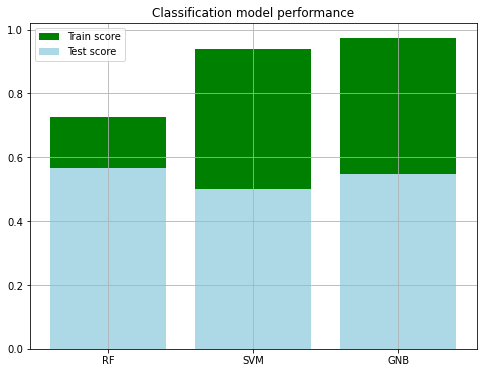

In [59]:
#plot performance

plt.figure(figsize=(8,6))
plt.bar(results.index, results['Train score'], label='Train score', color='green')
plt.bar(results.index, results['Test score'], label='Test score', color='lightblue')
plt.title('Classification model performance')
plt.grid()
plt.legend()
plt.savefig('Output/modelperformance.png')
plt.show()

C:\Users\lproc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


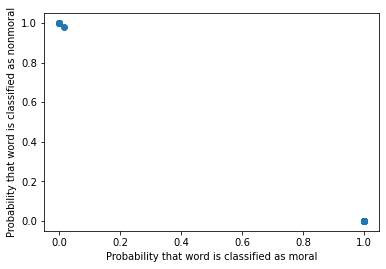

In [44]:
#apply to new data

import numpy as np

def preprocess(str_input):
    text_tmp = clean_text(str_input)
    text_tmp = rem_sw(text_tmp)
    text_tmp = stem_fun(text_tmp).split()
    vec_tmp = read_pickle('Functions/', 'tfidf').transform(text_tmp).toarray()
    return vec_tmp

def predict_label(str_input):
    df_tmp = pd.DataFrame(model_gnb.predict_proba(str_input))
    df_tmp.columns = ['High MNM', 'Low MNM']
    return df_tmp

text = 'In the first full legislative session after Roe v. Wade was overturned, states across the country are looking to further restrict or better protect abortion rights. ProPublica looked at what abortion legislation is on the table in 2023.'

df_a = predict_label(preprocess(text))
plt.scatter(df_a['High MNM'], df_a['Low MNM'])
plt.xlabel('Probability that word is classified as moral')
plt.ylabel('Probability that word is classified as nonmoral')
plt.show()

# Archive

## Data cleaning (not necessary for eFMD)

In [ ]:
def clean_text(str_in):
    import re
    tmp = re.sub(r'[^\w]', " ",str_in).lower().strip().replace("  ", " ")
    return tmp

#### Clean NYT abstract

In [ ]:
abs_clean = []
for i in nyt.abstract:
  try:
    abs_clean.append(clean_text(i))
  except:
    abs_clean.append('')

nyt['abstract_clean'] = abs_clean
nyt = nyt[['pub_date', 'abstract_clean']]
nyt.head()

#### Clean Supreme Court decisions

In [ ]:
text_clean = []
for i in sc.text:
  try:
    text_clean.append(clean_text(i))
  except:
    text_clean.append('')

sc['text_clean'] = text_clean
sc = sc[['year_filed', 'text_clean']]
sc.head()

### Plotting all variables

In [ ]:
import matplotlib.pyplot as plt

metrics = ['care_p', 'fairness_p', 'loyalty_p', 'authority_p', 'sanctity_p', 
'care_sent', 'fairness_sent', 'loyalty_sent', 'authority_sent',
'sanctity_sent', 'moral_nonmoral_ratio', 'f_var', 'sent_var']

for i in metrics:
  plt.figure(figsize=(6, 4))
  plt.scatter(nyt_df.year, nyt_df[i], alpha=0.5, color='lightblue', label='NYT articles')
  plt.scatter(sc_df.year_filed, sc_df[i], alpha=0.5, color='green', label='SCOTUS opinions')
  plt.legend()
  plt.xticks(rotation=90)
  plt.xlabel('Publication year')
  plt.ylabel(str(i))
  plt.title('{} of abortion-related NYC articles and SCOTUS opinions over time'.format(str(i)))
  plt.grid()
  plt.savefig('{}overtime.png'.format(str(i)))
  plt.show()

#### Note: scores that are calculated:


```
'care_p', 'fairness_p', 'loyalty_p', 'authority_p', 'sanctity_p', 
'care_sent', 'fairness_sent', 'loyalty_sent', 'authority_sent',
'sanctity_sent', 'moral_nonmoral_ratio', 'f_var', 'sent_var'
```

In [ ]:
#visualize sanctity.vice over time
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(nyt_df.year, nyt_df_v['sanctity.vice'], alpha=0.5, color='lightblue', label='NYT sanctity vice score')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Sanctity-vice scores')
plt.title('Sanctity-vice scores for the NYTimes over time')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(sc_df.year_filed, sc_df_v['sanctity.vice'], alpha=0.5, color='green', label='sanctity vice score')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Sanctity-vice scores')
plt.title('Sanctity-vice scores for the Supreme Court over time')
plt.grid()
plt.show()

## Scrapped idea for prediction model - given SCOTUS sanctity score in a given year, what will NYT sanctity score be?

In [ ]:
#subset dfs, group by year

sc_tmp = pd.concat((sc_df_v[['sanctity.virtue', 'sanctity.vice', 'year_filed']], sc_df[['sanctity_sent']]), axis=1)
sc_tmp.shape

nyt_tmp = pd.concat((nyt_df_v[['sanctity.virtue', 'sanctity.vice', 'year']], nyt_df[['sanctity_sent']]), axis=1)
nyt_tmp.shape

sc_tmp = sc_tmp.groupby('year_filed').max() #can change this to mean, median, min, etc.
nyt_tmp = nyt_tmp.groupby('year').max()

In [ ]:
import seaborn as sns
sns.regplot(data=sc_tmp, x=sc_tmp.index, y='sanctity_sent', label='sc sanctity sent')
sns.regplot(data=nyt_tmp, x=nyt_tmp.index, y='sanctity_sent', label='nyt sanctity sent')
plt.legend()
plt.show()

In [ ]:
#visualize sanctity scores over time
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(nyt_df.year, nyt_df.sanctity_sent, alpha=0.5, color='lightblue', label='NYT articles')
plt.scatter(sc_df.year_filed, sc_df.sanctity_sent, alpha=0.5, color='green', label='SCOTUS opinions')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Sanctity')
plt.title('Sanctity of abortion-related publishings over time')
plt.grid()
plt.show()

In [ ]:
#visualize sanctity.vice over time
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(nyt_df.year, nyt_df_v['sanctity.virtue'], alpha=0.5, color='blue', label='NYT sanctity-virtue')
plt.scatter(nyt_df.year, nyt_df_v['sanctity.vice'], alpha=0.5, color='red', label='NYT sanctity-vice')
plt.scatter(sc_df.year_filed, sc_df_v['sanctity.virtue'], alpha=0.5, color='green', label='SCOTUS sanctity-virtue')
plt.scatter(sc_df.year_filed, sc_df_v['sanctity.vice'], alpha=0.5, color='yellow', label='SCOTUS sanctity-vice')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Sanctity-vice, Sanctity-virtue')
plt.title('Sanctity-vice and sanctity-virtue over time')
plt.grid()
plt.savefig('san_vice_san_virtue.png')
plt.show()

In [ ]:
#visualize sanctity.vice over time SEPARATELY
# nyt first
plt.figure(figsize=(8, 6))
plt.scatter(nyt_df_v.year, nyt_df_v['sanctity.virtue'], alpha=0.5, color='blue', label='NYT sanctity-virtue')
plt.scatter(nyt_df_v.year, nyt_df_v['sanctity.vice'], alpha=0.5, color='red', label='NYT sanctity-vice')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Sanctity-vice, Sanctity-virtue')
plt.title('Sanctity-vice and sanctity-virtue over time')
plt.grid()
plt.savefig('san_vice_san_virtue_nyt.png')
plt.show()

In [ ]:
# SC next
plt.figure(figsize=(8, 6))
plt.scatter(sc_df.year_filed, sc_df_v['sanctity.virtue'], alpha=0.5, color='green', label='SCOTUS sanctity-virtue')
plt.scatter(sc_df.year_filed, sc_df_v['sanctity.vice'], alpha=0.5, color='yellow', label='SCOTUS sanctity-vice')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Sanctity-vice, Sanctity-virtue')
plt.title('Sanctity-vice and sanctity-virtue over time')
plt.grid()
plt.savefig('san_vice_san_virtue_nyt.png')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=sc_df_v.year_filed, y=sc_df_v['care.virtue'], data=sc_df_v, label='SCOTUS Virtue')
sns.regplot(x=sc_df_v.year_filed, y=sc_df_v['care.vice'], data=sc_df_v, label='SCOTUS Vice')
sns.regplot(x=nyt_df_v.year, y=nyt_df_v['care.virtue'], data=nyt_df_v, label='NYT Virtue')
sns.regplot(x=nyt_df_v.year, y=nyt_df_v['care.vice'], data=nyt_df_v, label='NYT Vice')
plt.grid()
plt.legend()
plt.ylabel('Care')
plt.savefig('Output/vicevirtueregression.png')
plt.show()